<a href="https://colab.research.google.com/github/mcoto/HTS-ParallelTraining/blob/master/IE0247_Tarea1_I_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplos de operaciones sobre señales


### Superposición (o suma)

La superposición ponderada $x(t)$ de dos señales $x_\text{A}(t)$ y $x_\text{B}(t)$ se realiza simplemente como

\begin{equation}
x(t) = A \cdot x_\text{A}(t) + B \cdot x_\text{B}(t)
\end{equation}

con las constantes $A, B \in \mathbb{C}$.

**Ejemplo 1**

El siguiente ejemplo ilustra la superposición de dos señales periódicas $x_\text{A}(t) = A \cdot \cos(\omega_\text{A} t)$ y $x_\text{B}(t) = B \cdot \cos(\omega_\text{B} t)$ con pesos $A$, $B$ y frecuencias angulares $\omega_\text{A}$ y $\omega_\text{B}$.

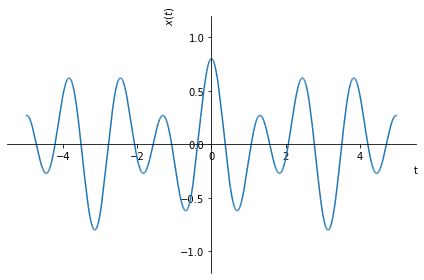

In [ ]:
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)

A = .3
omA = 3
B = .5
omB = 5

x = A*sym.cos(omA*t) + B*sym.cos(omB*t)

sym.plot(x, (t, -5, 5), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');

# ▶ **Pregunta 1:** #

¿Es el resultado de esta suma una señal periódica? 
Responda la pregunta usando teoría de señales periódicas, y modifique el código anterior para que la gráfica se despliegue con mayor rango de valores en el eje x y se evidencie su respuesta.

### Desplazamiento temporal
El desplazamiento temporal de una señal $x(t)$ un tiempo $\tau$ es una operación que se aplica con frecuencia en el procesamiento de señales. Por ejemplo, para modelar la propagación de señales desde un actuador a un sensor.

La señal desplazada temporalmente $x(t)$ se modela como

\begin{equation}
y(t) = x(t-\tau)
\end{equation}
con $\tau \in \mathbb{R}$. La señal $x(t)$ es

* desplazado a la derecha (*retraso*) para $\tau > 0$
* desplazado a la izquierda (*adelanto*) para $\tau < 0$

**Ejemplo 2**

Para ilustrar el desplazamiento temporal de las señales, se considera la construcción de una señal de escalera mediante una superposición de señales rectangulares desplazadas.

\begin{equation}
x(t) = \text{rect}\left(t - \frac{1}{2} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{ 3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right)
\end{equation}

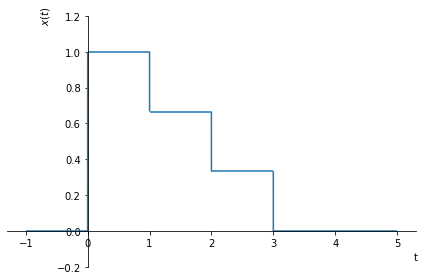

In [ ]:
rect = sym.Heaviside(t + 1/2) - sym.Heaviside(t - 1/2)
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)

sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

# ▶ **Pregunta 2:** #

Agregue otro escalón al comienzo de la señal del ejemplo anterior modificando el código dado. En la respuesta incluya el código y el resultado gráfico de la señal. 

### Escalamiento temporal

La escala temporal de una señal $x(t)$ se define como

\begin{equation}
y(t) = x(a \cdot t)
\end{equation}

con $a \in \mathbb{R}$. La señal $x(t)$ es

* expandida si $0 < a < 1$
* comprimida si $a > 1$
* invertida en el tiempo y escalada si $a < 0$


**Ejemplo 3**

El siguiente ejemplo ilustra el escalamiento temporal de la señal $y(t) = x(a \cdot t)$ presentada en el ejemplo anterior. El $x(t)$ original se muestra en gris, mientras que la señal escalada $y(t)$ en azul. Aquí se realiza la expansión, de modo que $y(t)$ es el doble de larga que $x(t)$.

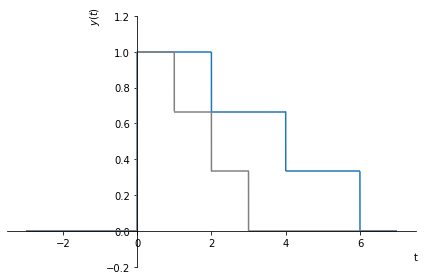

In [ ]:
a = 1/2
y = x.subs(t, a*t)


px = sym.plot(x, (t, -3, 7), ylim=[-0.2, 1.2],
              ylabel=r'$x(t)$', show=False, line_color='gray')
py = sym.plot(y, (t, -3, 7),
              ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
py.extend(px)
py.show()

# ▶ **Pregunta 3:** #

* a) Modifique el código anterior de manera que la señal se comprima en el tiempo.
* b) Modifique el ejemplo anterior de manera que la señal se invierta en el tiempo. 

**Copyright**

Este cuaderno ha sido adaptado de: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.
